## ***Importing initializing and installing the requrements as per..!***


#### ***requirements to analyze the attendentence and attrition rate of the employees***

```





In [1]:
pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from sklearnex import patch_sklearn
# from daal4py.oneapi import sycl_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67903 sha256=f7aef73f2c1a9a1c253c0ea2d5ef90e23bb70167e967cbe0df74341acc3b1efd
  Stored in directory: /home/u191324/.cache/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


#  observations from the feature engineering csv

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly
from plotly.offline import download_plotlyjs,plot, iplot, init_notebook_mode
from sklearnex import patch_sklearn
patch_sklearn()
import cufflinks as cf
cf.go_offline()
import plotly
from plotly import graph_objs as go

init_notebook_mode(connected=True)
%matplotlib inline

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
train = pd.read_csv("train_data_final.csv")

In [ ]:
train.head()

,EmployeeID,Left_Company,Job_History,Joining_Date,Designation,Sex,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,0.0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,205.0,189.0,72.0,189.0,3,231
1,emp-10,1.0,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,241.0,233.0,120.0,186.0,2,147
2,emp-100,0.0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,278.0,264.0,40.0,264.0,3,308
3,emp-101,0.0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,345.5,233.5,64.0,0.0,2,217
4,emp-102,0.0,Worked at Company - 234,2011_12,Senior,1,270.0,249.0,88.0,213.0,2,231


In [ ]:
train.isnull().sum()

EmployeeID           0
Left_Company         0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
dtype: int64

## Uni-Variate Analysis - Independent variables.

Sex counts in the data: 
1    216
0     29
Name: Sex, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


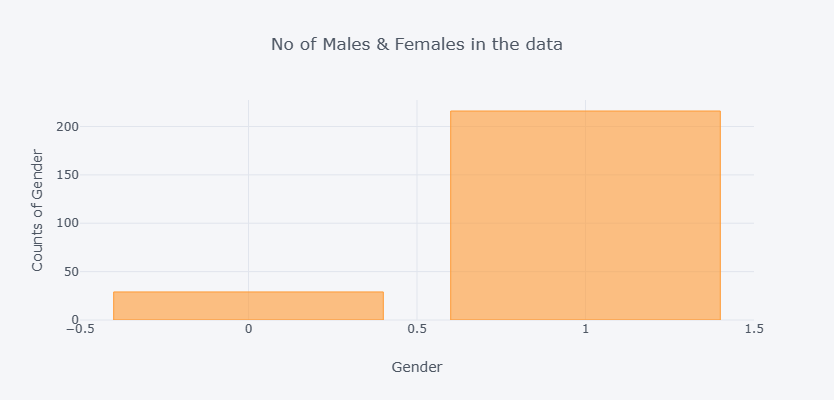

In [ ]:
#Checking the count's of the gender in the data.

print("Sex counts in the data: ")
print(train['Sex'].value_counts())
print("------------------------------------------------------------------------------------------------------------------------------")

#visulaize using the graph
train['Sex'].value_counts().iplot(kind='bar', yTitle="Counts of Gender", 
                                  xTitle="Gender", title="No of Males & Females in the data",
                                 dimensions=(400,400))


Designation counts in the data: 
Junior    79
Senior    63
VP        63
EVP       28
MD        12
Name: Designation, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


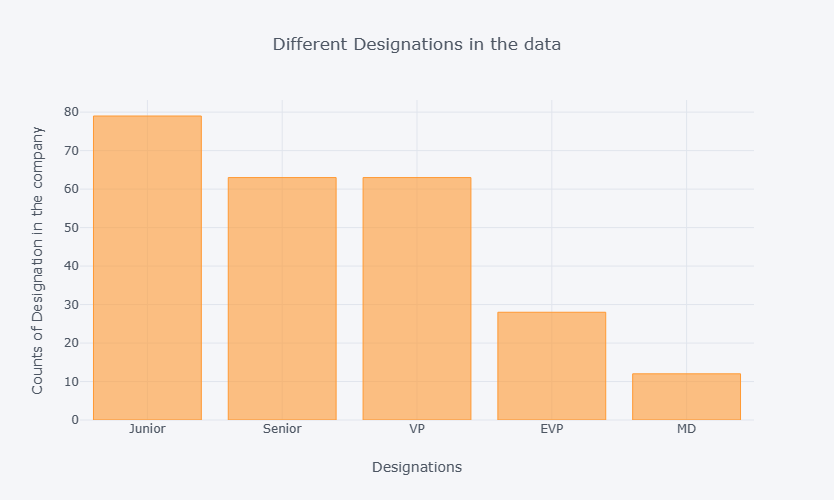

In [ ]:
#Checking the different designations in the data. 

print("Designation counts in the data: ")
print(train['Designation'].value_counts())
print("------------------------------------------------------------------------------------------------------------------------------")

train['Designation'].value_counts().iplot(kind='bar', yTitle="Counts of Designation in the company",
                                          xTitle="Designations", title="Different Designations in the data",
                                 dimensions=(600,500))


## Observations
 **In the company most of the designations belong to Junior, Senior & VP** 

No of projects that each employess work on most: 
2    123
3     57
1     30
4     16
5      8
6      5
0      5
7      1
Name: NoOfProjects, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


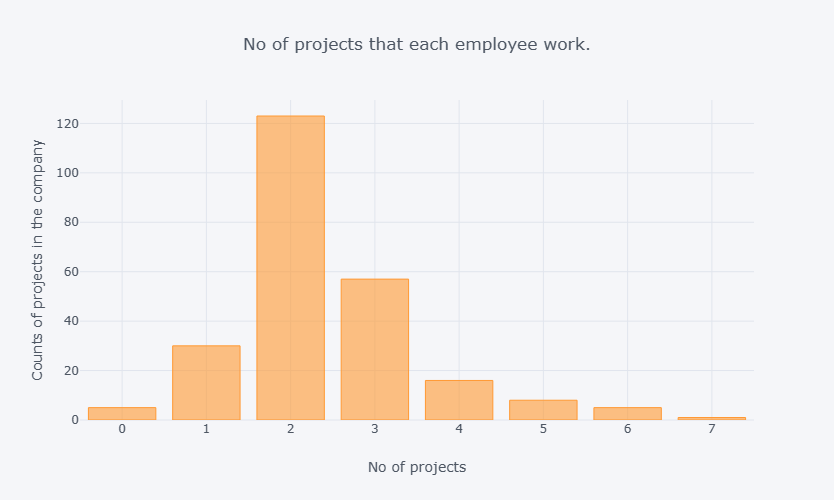

In [ ]:

print("No of projects that each employess work on most: ")
print(train['NoOfProjects'].value_counts())
print("------------------------------------------------------------------------------------------------------------------------------")

train['NoOfProjects'].value_counts().iplot(kind='bar', yTitle="Counts of projects in the company",
                                           xTitle="No of projects", title="No of projects that each employee work.",
                                 dimensions=(600,500))


## Observation:
 **Mostly employess end up doing 2 or 3 projects in the company.**

Joning dates of the employee's in the company
2012_05    17
2012_02    15
2012_09    13
2013_02    10
2009_07    10
2012_11    10
2013_01     9
2010_07     8
2011_02     8
2011_12     7
Name: Joining_Date, dtype: int64
------------------------------------------------------------------------------------------------------------------------------


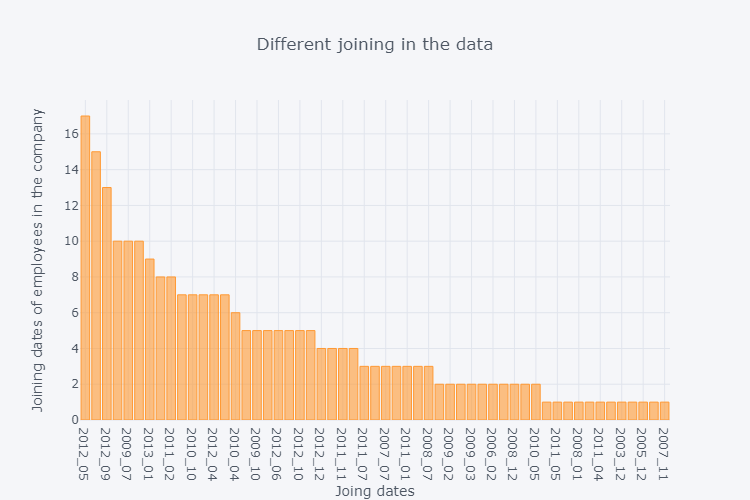

In [ ]:
#Joining dates in the company by year

print("Joning dates of the employee's in the company")

#Check which year or month when employees hired most
print(train['Joining_Date'].value_counts().head(10))
print("----------------------------------------------------------------------------------")

#visualize the Joning dates 
train['Joining_Date'].value_counts().iplot(kind='bar', yTitle="Joining dates of employees in the company",
                                           xTitle="Joing dates", title="Different joining in the data",
                                 dimensions=(600,500))


## Observation:
- **Most of the employess are hired from the year 2010 to 2013.**
- **In 2020 most employees(45) were hired.**

## Dependent variable distribution.

0.0    218
1.0     27
Name: Left_Company, dtype: int64


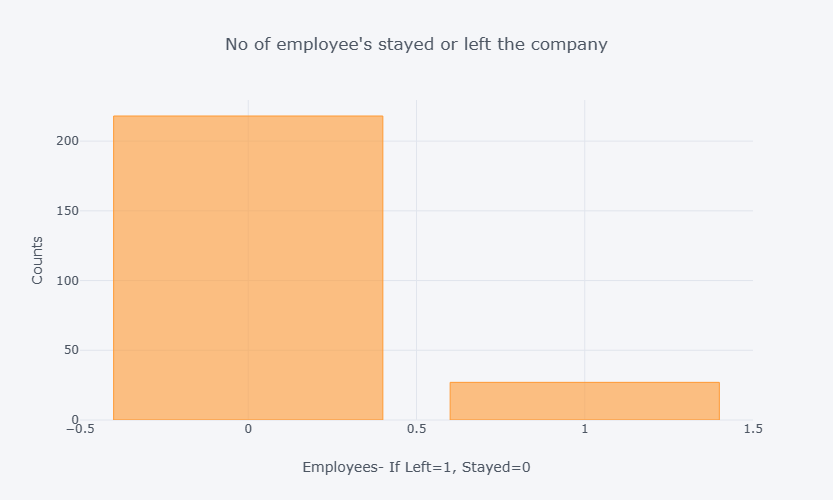

------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#No of people left the company(Our target column)

#Counts of the People left the company
print(train['Left_Company'].value_counts().head(10))

#Visualizing the same value counts.
train['Left_Company'].value_counts().iplot(kind='bar', yTitle="Counts",
                                           xTitle="Employees- If Left=1, Stayed=0", title="No of employee's stayed or left the company",
                                 dimensions=(400,500))
print("------------------------------------------------------------------------------------------------------------------------------")


## Obsevations: 
- **27 Employees left the company**

### Distributions of the Numerical variables:

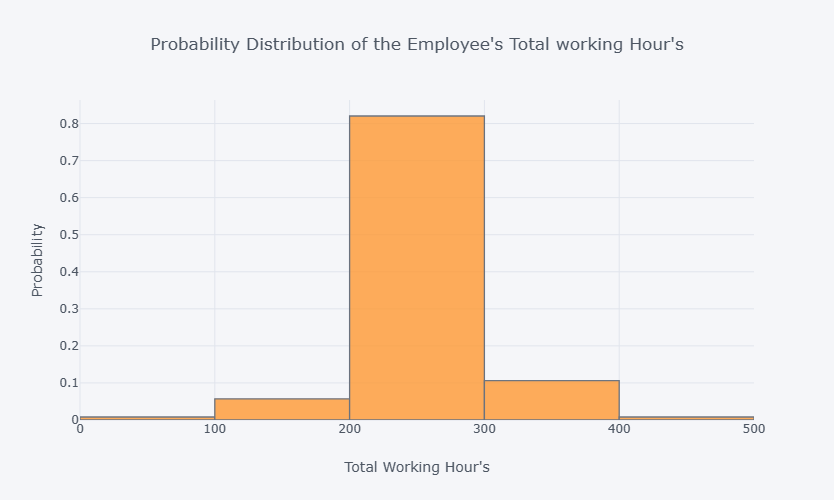

In [ ]:
#checking the distriburion of the Total working hour's column. 

#Total working hours of the employee's logged: 
#Let's plot the probability Distribution on the column so  that we can understand the %of employee's working hour's
train['TotalWorkingHours'].iplot(kind='histogram', dimensions=(800,500), xTitle="Total Working Hour's", 
                                 yTitle="Probability", 
                                 title="Probability Distribution of the Employee's Total working Hour's", 
                                 histnorm='probability', bins=6)

## Observation: 
**Most Employee's Total Working hours are 200-300(i.e- around 80% of the employee's)**


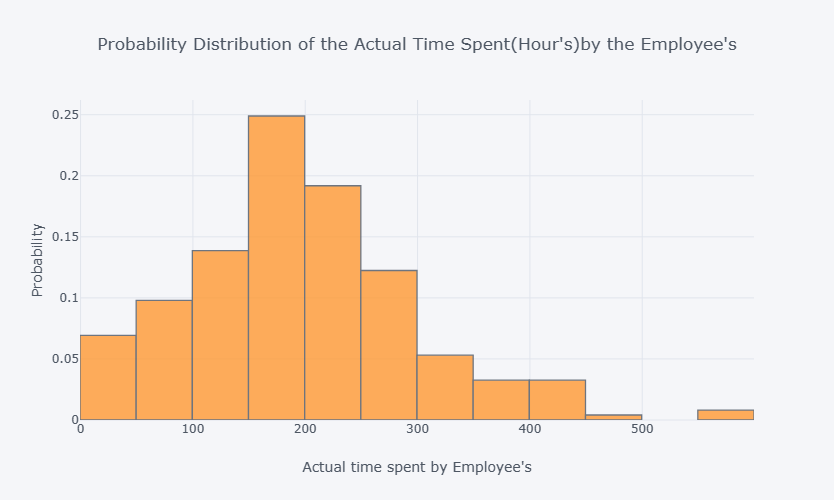

In [ ]:

train['ActualTimeSpent'].iplot(kind='histogram', dimensions=(800,500), histnorm='probability', 
                              xTitle="Actual time spent by Employee's",
                              yTitle="Probability",
                              title="Probability Distribution of the Actual Time Spent(Hour's)by the Employee's")

## Observations: 
Employees logging more hours than they actually work may indicate extra work done, inaccurate time tracking or overestimation. Employers must address discrepancies to ensure fair compensation and optimal efficiency.

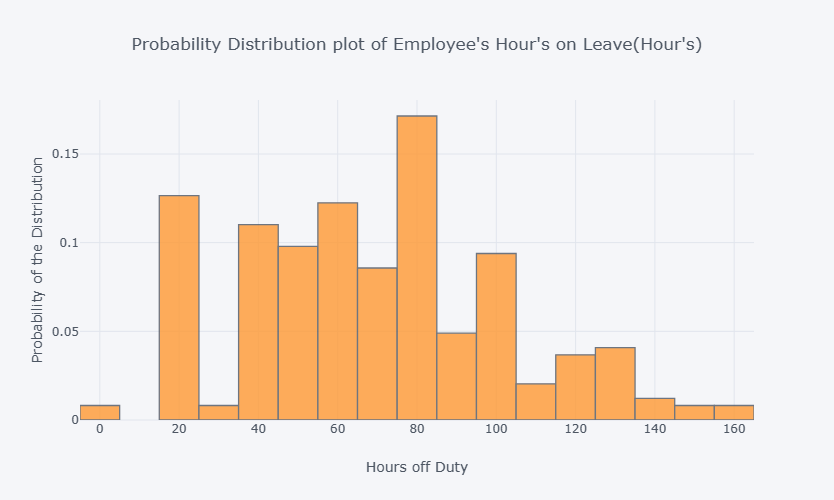

In [ ]:
#Let's check--  Hours_off_Duty : Number of hours the employee took off: 

train['Hours_off_Duty'].iplot(kind='histogram', dimensions=(800,500), histnorm='probability', histfunc='avg',
                             yTitle="Probability of the Distribution",
                             xTitle="Hours off Duty", 
                             title="Probability Distribution plot of Employee's Hour's on Leave(Hour's)")


## Bi-Variate analysis - With Dependent variable

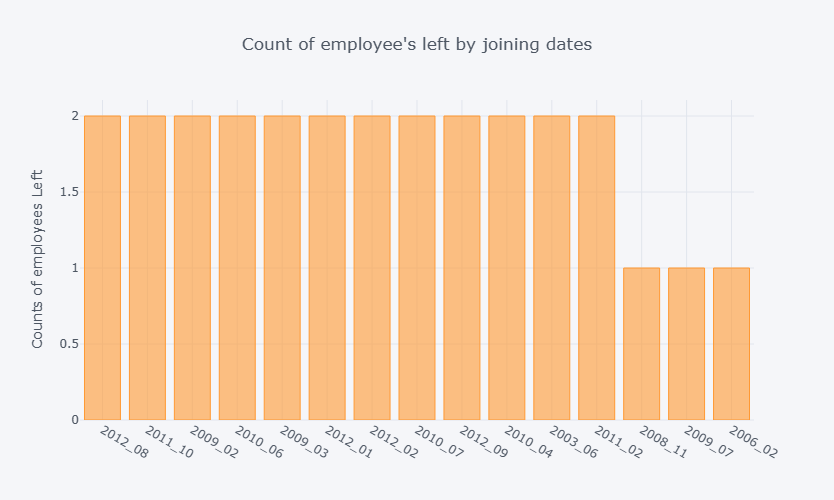

In [ ]:
#No of people left the comapany when no of employees joined

train[train.Left_Company==1.0].Joining_Date.value_counts().iplot(kind='bar', dimensions=(600,500), yTitle="Counts of employees Left", 
                                                                title="Count of employee's left by joining dates")

## Observation: 
- **Most of the people left the company in the year 2012.**

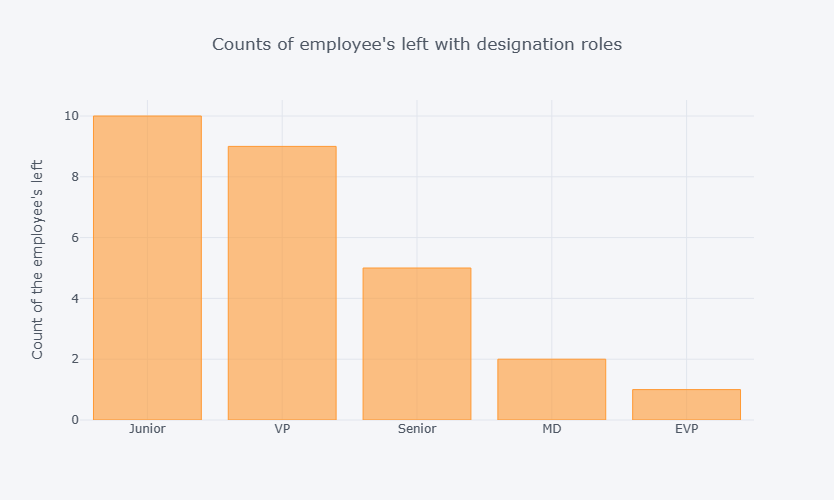

In [ ]:
#let's see the designations of the people leaving the company. 
train[train.Left_Company==1.0].Designation.value_counts().iplot(kind='bar', dimensions=(600,500), 
                                                                yTitle="Count of the employee's left",
                                                               title="Counts of employee's left with designation roles")

## Observations:
- **Most of the people leaving are of Designation Junior, VP, Senior.**

Count's of employees leaving by doing no of projects: 
2    20
6     2
4     2
3     2
5     1
Name: NoOfProjects, dtype: int64
------------------------------------------------------------------------------------------------


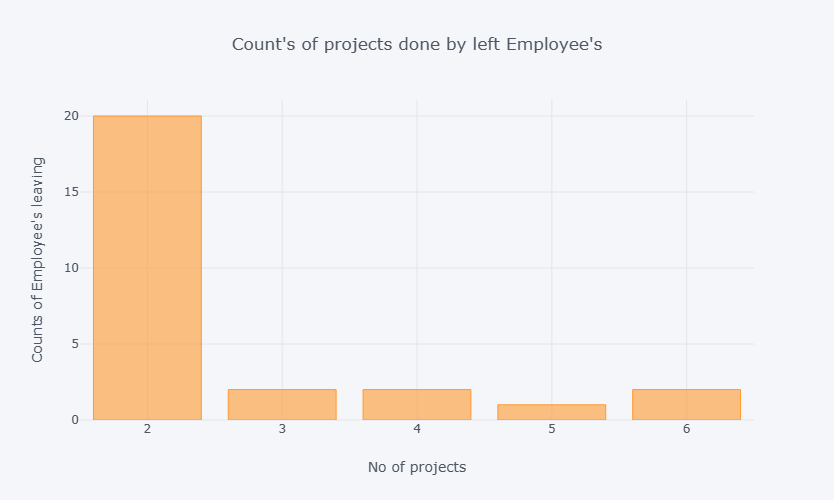

In [ ]:
# No Of Projects vs the people left the company 
#value count's of employees leaving by doing no of projects

print("Count's of employees leaving by doing no of projects: ")
print(train[train.Left_Company==1.0].NoOfProjects.value_counts())
print("------------------------------------------------------------------------------------------------")
train[train.Left_Company==1.0].NoOfProjects.value_counts().iplot(kind='bar', dimensions=(600,500), 
                                                                yTitle="Counts of Employee's leaving",
                                                                 xTitle="No of projects",
                                                               title="Count's of projects done by left Employee's")

## Onservations:
- **Employee's who are leaving have done only two projects**

Count's of employees leaving by Gender: 
1    22
0     5
Name: Sex, dtype: int64
------------------------------------------------------------------------------------------------


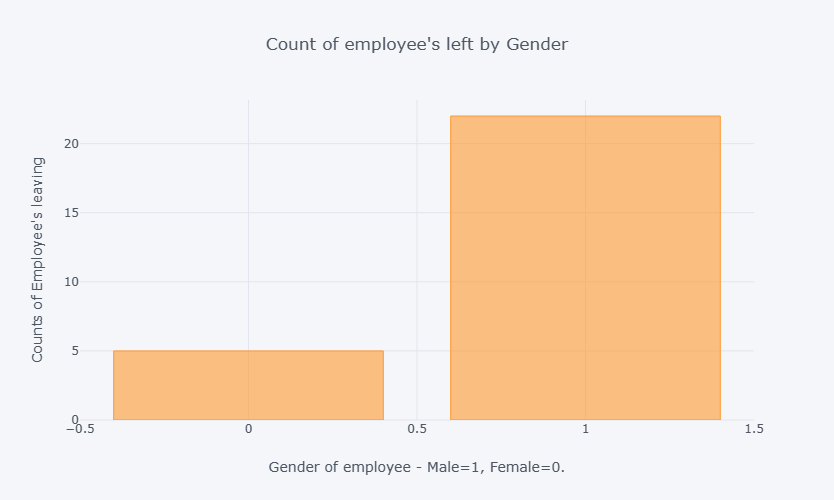

In [ ]:
#Employee's left the company on gender 

#Count's of employees left by Gender: 
print("Count's of employees leaving by Gender: ")
print(train[train.Left_Company==1.0].Sex.value_counts())
print("------------------------------------------------------------------------------------------------")
train[train.Left_Company==1.0].Sex.value_counts().iplot(kind='bar', dimensions=(400,500), 
                                                                yTitle="Counts of Employee's leaving",
                                                                 xTitle="Gender of employee - Male=1, Female=0. ",
                                                        title="Count of employee's left by Gender")

## Observations: 
- **He must be fit for the company.**

##                                                    --------------------Tier(3)successfully completed -----------------------